In [ ]:
#install the opendatasets
!pip install opendatasets

In [74]:
#import the modules
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [ ]:
#add data from kaggle
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hirushamaduwantha
Your Kaggle Key: ··········


100%|██████████| 7.63k/7.63k [00:00<00:00, 8.98MB/s]

In [ ]:
#import the data
data = pd.read_csv("random-linear-regression/test.csv")

In [ ]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [ ]:
data.shape

(300, 2)

In [ ]:
x = data["x"]
y = data["y"]

In [ ]:
y

0      79.775152
1      23.177279
2      25.609262
3      17.857388
4      41.849864
         ...    
295    68.545888
296    47.334876
297    54.090637
298    63.297171
299    52.459467
Name: y, Length: 300, dtype: float64

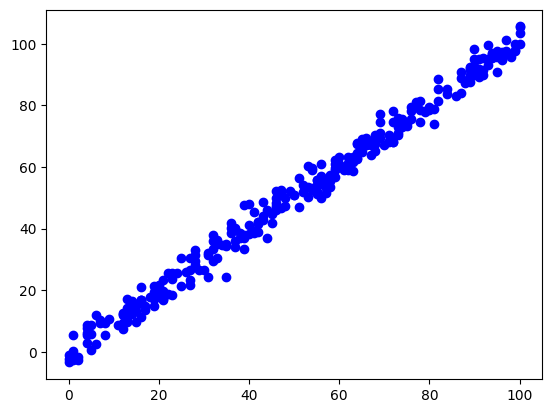

In [ ]:
#plot the data
plt.scatter(x,y,color="blue")
plt.show()

In [ ]:
#split the data to training set and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [ ]:
x_train.shape,x_test.shape

((240,), (60,))

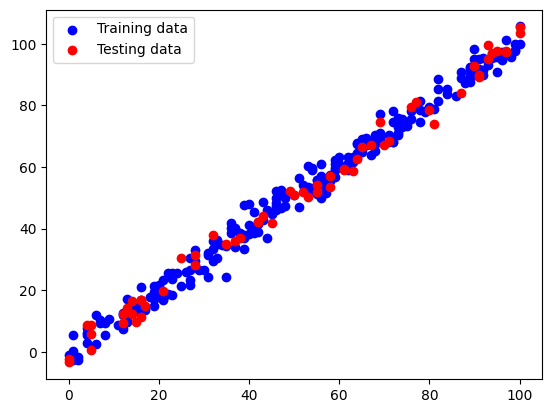

In [ ]:
#plot the training data and testing data
plt.scatter(x_train,y_train,color="blue",label = "Training data")
plt.scatter(x_test,y_test,color = "red",label = "Testing data")
plt.legend()
plt.show()

**Model Building**

In [ ]:
#create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4,input_shape = (1,)),
    tf.keras.layers.Dense(1)
    ]
)

#compile model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics =['mae'])

#train model
epoch_num = 4
model.fit(tf.expand_dims(x_train,axis = 1),y_train,epochs = epoch_num)



Epoch 1/4
8/8 [==============================] - 0s 5ms/step - loss: 36.7468 - mae: 36.7468
Epoch 2/4
8/8 [==============================] - 0s 3ms/step - loss: 21.2575 - mae: 21.2575
Epoch 3/4
8/8 [==============================] - 0s 4ms/step - loss: 27.2752 - mae: 27.2752
Epoch 4/4
8/8 [==============================] - 0s 4ms/step - loss: 20.5499 - mae: 20.5499


In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 4)                 8         
                                                                 
 dense_23 (Dense)            (None, 1)                 5         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_pred = model.predict(x_test)
y_pred[:5]

2/2 [==============================] - 0s 7ms/step


array([[190.12164 ],
       [160.55902 ],
       [198.56815 ],
       [ 10.634257],
       [192.23329 ]], dtype=float32)

In [ ]:
y_test[:5]

203    92.887723
266    79.503415
152    97.001484
9       8.746748
233    89.739520
Name: y, dtype: float64

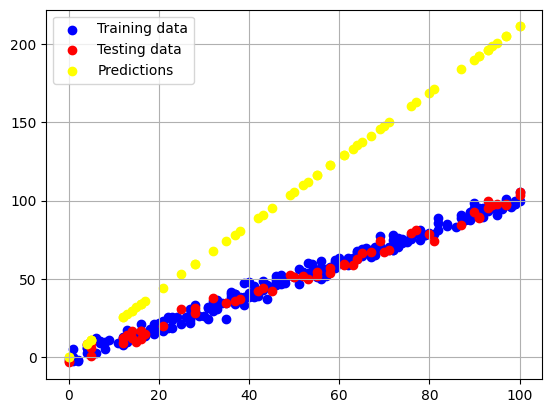

In [ ]:
#plot the data
plt.scatter(x_train,y_train,color="blue",label = "Training data")
plt.scatter(x_test,y_test,color = "red",label = "Testing data")
plt.scatter(x_test,y_pred,color = "yellow",label = "Predictions")
plt.legend()
plt.grid()
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 12ms/step - loss: 29.4753 - mae: 29.4753


[29.475250244140625, 29.475250244140625]

In [ ]:
y_test.shape #one demention

(60,)

In [ ]:
y_pred.shape #two demention

(60, 1)

In [ ]:
tf.squeeze(y_pred).shape #convert to one demention

TensorShape([60])

In [ ]:
#Mean abs error
mae = tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred)) #convert to one demention
mae

<tf.Tensor: shape=(), dtype=float32, numpy=55.652515>

**Improving the model**

In [ ]:
#create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,input_shape = (1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ]
)

#compile model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.05),
              metrics =['mae'])

#train model
epoch_num = 10
history = model.fit(tf.expand_dims(x_train,axis = 1),y_train,epochs = epoch_num)



Epoch 1/10
8/8 [==============================] - 1s 4ms/step - loss: 47.2382 - mae: 47.2382
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: 27.6752 - mae: 27.6752
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 8.9121 - mae: 8.9121
Epoch 4/10
8/8 [==============================] - 0s 7ms/step - loss: 6.5750 - mae: 6.5750
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 3.6186 - mae: 3.6186
Epoch 6/10
8/8 [==============================] - 0s 4ms/step - loss: 3.6866 - mae: 3.6866
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: 2.8263 - mae: 2.8263
Epoch 8/10
8/8 [==============================] - 0s 4ms/step - loss: 2.5029 - mae: 2.5029
Epoch 9/10
8/8 [==============================] - 0s 3ms/step - loss: 2.4589 - mae: 2.4589
Epoch 10/10
8/8 [==============================] - 0s 3ms/step - loss: 2.4227 - mae: 2.4227


In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                128       
                                                                 
 dense_37 (Dense)            (None, 10)                650       
                                                                 
 dense_38 (Dense)            (None, 1)                 11        
                                                                 
Total params: 789 (3.08 KB)
Trainable params: 789 (3.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_pred = model.predict(x_test)
y_pred[:5]

2/2 [==============================] - 0s 7ms/step


array([[89.89175 ],
       [75.95739 ],
       [93.872986],
       [ 5.290271],
       [90.88706 ]], dtype=float32)

In [ ]:
y_test[:5]

203    92.887723
266    79.503415
152    97.001484
9       8.746748
233    89.739520
Name: y, dtype: float64

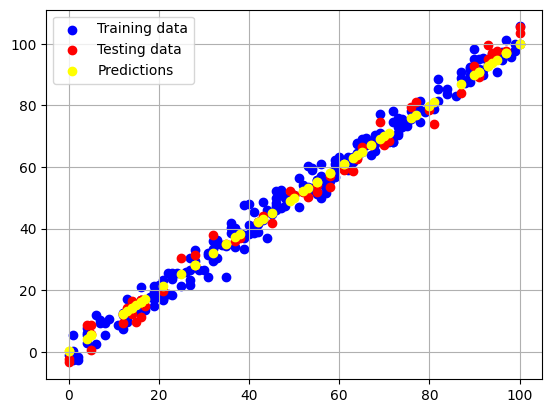

In [ ]:
#plot the data
plt.scatter(x_train,y_train,color="blue",label = "Training data")
plt.scatter(x_test,y_test,color = "red",label = "Testing data")
plt.scatter(x_test,y_pred,color = "yellow",label = "Predictions")
plt.legend()
plt.grid()
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 2.5345 - mae: 2.5345


[2.5345256328582764, 2.5345256328582764]

In [ ]:
#Mean abs error
mae = tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred)) #convert to one demention
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.5345254>

In [ ]:
history.history

{'loss': [47.2381591796875,
  27.675153732299805,
  8.91205883026123,
  6.575036525726318,
  3.61857533454895,
  3.6866445541381836,
  2.8262569904327393,
  2.5029170513153076,
  2.45894718170166,
  2.4226572513580322],
 'mae': [47.2381591796875,
  27.675153732299805,
  8.91205883026123,
  6.575036525726318,
  3.61857533454895,
  3.6866445541381836,
  2.8262569904327393,
  2.5029170513153076,
  2.45894718170166,
  2.4226572513580322]}

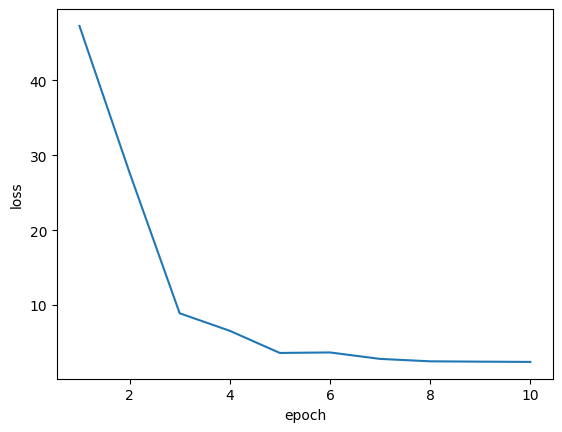

In [ ]:
x_range = range(1,epoch_num+1)
loss = history.history['loss']
plt.plot(x_range,loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
for layer in model.layers:
  weights = layer.get_weights()[0]
  biases = layer.get_weights()[1]
  print(f"\nWeights:\n {weights} \nBiases:\n {biases}")



Weights:
 [[-0.20000926 -0.24451107 -0.22679897 -0.02897811  0.10632436  0.22299218
  -0.26120013 -0.20972987 -0.03532401  0.08044633  0.05031088 -0.15583025
   0.15603118  0.23755191 -0.01472416 -0.07137907  0.0844782  -0.11160951
   0.1967945  -0.0809662  -0.14796764 -0.06925178 -0.06721924 -0.20415562
   0.25736243 -0.20574436 -0.22182901 -0.17574236 -0.02995319 -0.03028744
   0.18228118 -0.06125626 -0.05459665 -0.22360393 -0.30535555 -0.18688919
  -0.05023319  0.29818964  0.23079705 -0.07278631 -0.13073131 -0.1061517
  -0.11918333  0.12209558  0.30773842 -0.20195352  0.28663388 -0.03300219
  -0.09838894 -0.05938888  0.24415442 -0.03959615  0.31781375 -0.07282477
  -0.20145294 -0.15725148 -0.03331146 -0.16442838  0.07232004  0.0512916
  -0.06363101 -0.19948497 -0.10190008 -0.21027398]] 
Biases:
 [-0.01721746 -0.01869947  0.02680425  0.02122884  0.01520682 -0.02585321
 -0.01698107 -0.0181706   0.02036964 -0.02313233 -0.0214191   0.02081439
  0.01737131  0.01859908 -0.01876859  0.023